# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Rifai Nugroho]
- **Email:** [ripaipaai@gmail.com]
- **ID Dicoding:** [ripaipaai]



---



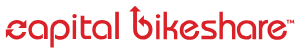

## 1. Project Introduction


### 1.1. Background

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic,
environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.


### 1.2. Dataset

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com.



---



## 2. Menentukan Pertanyaan Bisnis

1.   Bagaimana tren peminjaman sepeda berdasarkan bulan dari tahun 2011 - 2012?
2.   Apakah terdapat perbedaan pola peminjaman antara casual dan registered?
3.   Apakah musim berpengaruh terhadap jumlah peminjaman sepeda?
4.   Bagaimana pengaruh suhu, kelembaban, dan kecepatan angin terhadap jumlah peminjaman sepeda?



---



## 3. Library yang Digunakan

In [201]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler



---



## 4. Mounting Google Drive in Google Colab

In [202]:
# Mengambil dataset dari drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---



## 5. Data Wrangling

### 5.1 Gathering Data

In [203]:
# Menampilkan dataset
df = pd.read_csv('/content/drive/MyDrive/Dicoding 2024/day.csv')
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


Menampilkan dataset dari index 0 - 9, sebagai contoh output saja karena data terlalu banyak jika ditampilkan semua

### Dataset Dictionary

- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

#### Informasi didapatkan dari file Readme.txt dicoding

### 5.2 Assessing Data

Pada tahap ini, Kita akan melihat struktur data, mengecek keberadaan nilai yang hilang, memeriksa tipe data, dan lain-lain.

### Mengecek tipe data dan informasi dataset

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Mengecek Missing Values

In [205]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Periksa Nilai Duplikat

In [206]:
df.duplicated().sum()

0

### Mengevaluasi kualitas data

In [207]:
df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


### Menampilkan Ukuran DataFrame

In [208]:
df.shape

(731, 16)

Jumlah data ada 731 dan fitur ada 16

### Menampilkan Ukuran DataFrame

In [209]:
df[['temp', 'atemp']].corr()

,temp,atemp
temp,1.000000,0.991702
atemp,0.991702,1.000000


### 5.3 Cleaning Data

### Konversi Tipe Data dteday

In [210]:
df['dteday'] = pd.to_datetime(df['dteday'])

df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


Mengonversi ke tipe data time

### Konversi Data Season ke Label Season

In [211]:
season_mapping = {1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'}

df['season'] = df['season'].map(season_mapping)

df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,springer,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,springer,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,springer,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,springer,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,springer,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


Mengonversi dari numerik ke label

### Konversi Data Tahun ke Label Tahun

In [212]:
df['yr'] = df['dteday'].dt.year

df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,springer,2011,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,springer,2011,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,springer,2011,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,springer,2011,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,springer,2011,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


Mengonversi dari numerik ke label

### Konversi Data Bulan ke Label Bulan

In [213]:
df['mnth'] = df['dteday'].dt.month_name()

df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,January,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,January,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,January,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,January,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,January,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,springer,2011,January,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,springer,2011,January,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,springer,2011,January,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,springer,2011,January,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,springer,2011,January,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


Mengonversi dari numerik ke label

### Konversi Data Hari ke Label Hari

In [214]:
df['weekday'] = df['dteday'].dt.day_name()

df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,springer,2011,January,0,Thursday,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,springer,2011,January,0,Friday,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,springer,2011,January,0,Saturday,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,springer,2011,January,0,Sunday,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,springer,2011,January,0,Monday,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


Mengonversi dari numerik ke label

### Mengembalikan Nilai temp, atemp, hum, dan windspeed ke Nilai Sebelum Normalisasi

In [215]:
df['temp'] = df['temp']*41
df['atemp'] = df['atemp']*50
df['hum'] = df['hum']*100
df['windspeed'] = df['windspeed']*67
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,January,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,springer,2011,January,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,springer,2011,January,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,springer,2011,January,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,springer,2011,January,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,2011-01-06,springer,2011,January,0,Thursday,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,2011-01-07,springer,2011,January,0,Friday,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,2011-01-08,springer,2011,January,0,Saturday,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,2011-01-09,springer,2011,January,0,Sunday,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,2011-01-10,springer,2011,January,0,Monday,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


 Untuk mendapatkan interpretasi yang lebih intuitif dari data

### Simpan Dataset yang Sudah dibersihkan

In [216]:
df.to_csv('Cleaned_Bike_Sharing.csv', index=False)

Membuat dataset baru yang berisi data yang sudah dibersihkan

## 6. Exploratory Data Analysis (EDA)

### Histogram

In [217]:
df.dtypes

instant                int64
dteday        datetime64[ns]
season                object
yr                     int64
mnth                  object
holiday                int64
weekday               object
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

### 6.1 Univariate Analysis

### Histogram

In [218]:
float_vars = ['temp', 'atemp', 'hum', 'windspeed']
df_float = df[float_vars]

df_float.describe()

,temp,atemp,hum,windspeed
count,731.000000,731.000000,731.000000,731.000000
mean,20.310776,23.717699,62.789406,12.762576
std,7.505091,8.148059,14.242910,5.192357
min,2.424346,3.953480,0.000000,1.500244
25%,13.820424,16.892125,52.000000,9.041650
50%,20.431653,24.336650,62.666700,12.125325
75%,26.872076,30.430100,73.020850,15.625371
max,35.328347,42.044800,97.250000,34.000021


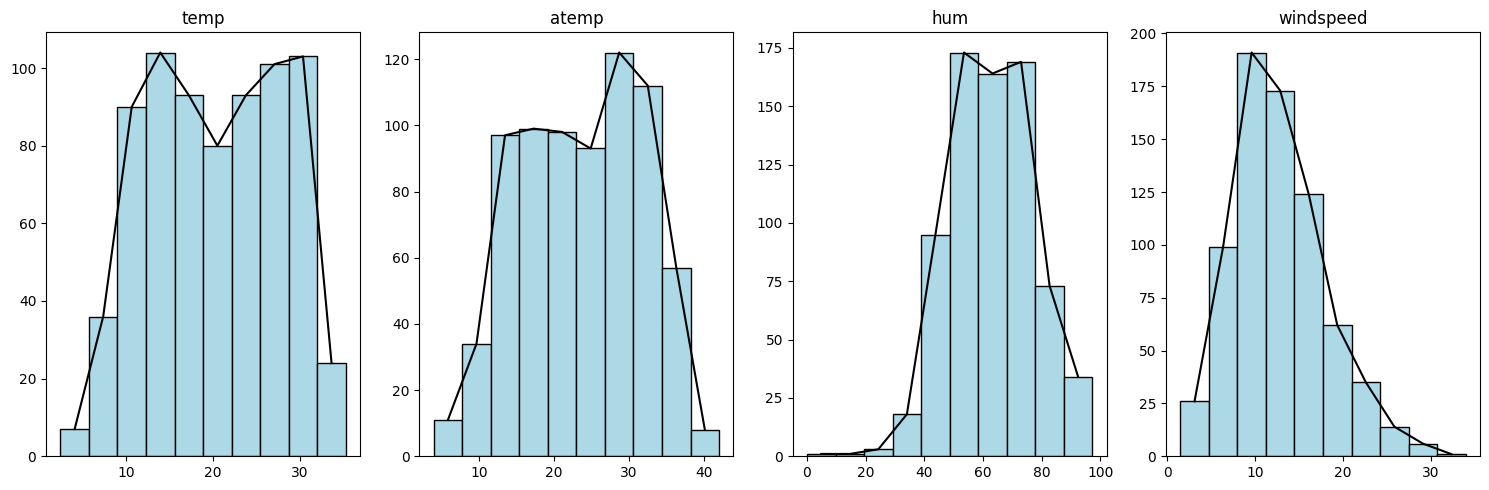

In [219]:
fig, axs = plt.subplots(1, 4, figsize=(15,5))

for i, ax in enumerate(axs):
    counts, bins, patches = ax.hist(df_float[float_vars[i]], bins=10, color='lightblue', edgecolor='black')

    midpoints = (bins[1:] + bins[:-1]) / 2

    ax.plot(midpoints, counts, color='black', linestyle='-')

    ax.set_title(float_vars[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()

plt.show()

temp : berdasarkan visualisasi di atas, kita dapat melihat bahwasannya suhu maksimal sekitar 35 derajat

atemp : berdasarkan visualisasi di atas, kita dapat melihat bahwasannya suhu maksimal sekitar 42 derajat

hum : berdasarkan visualisasi di atas, kita dapat melihat bahwasannya kelembaban maksimal sekitar 97 persen

windspeed : berdasarkan visualisasi di atas, kita dapat melihat bahwasannya kecepatan angin maksimal sekitar 34 m/h

### Boxplot

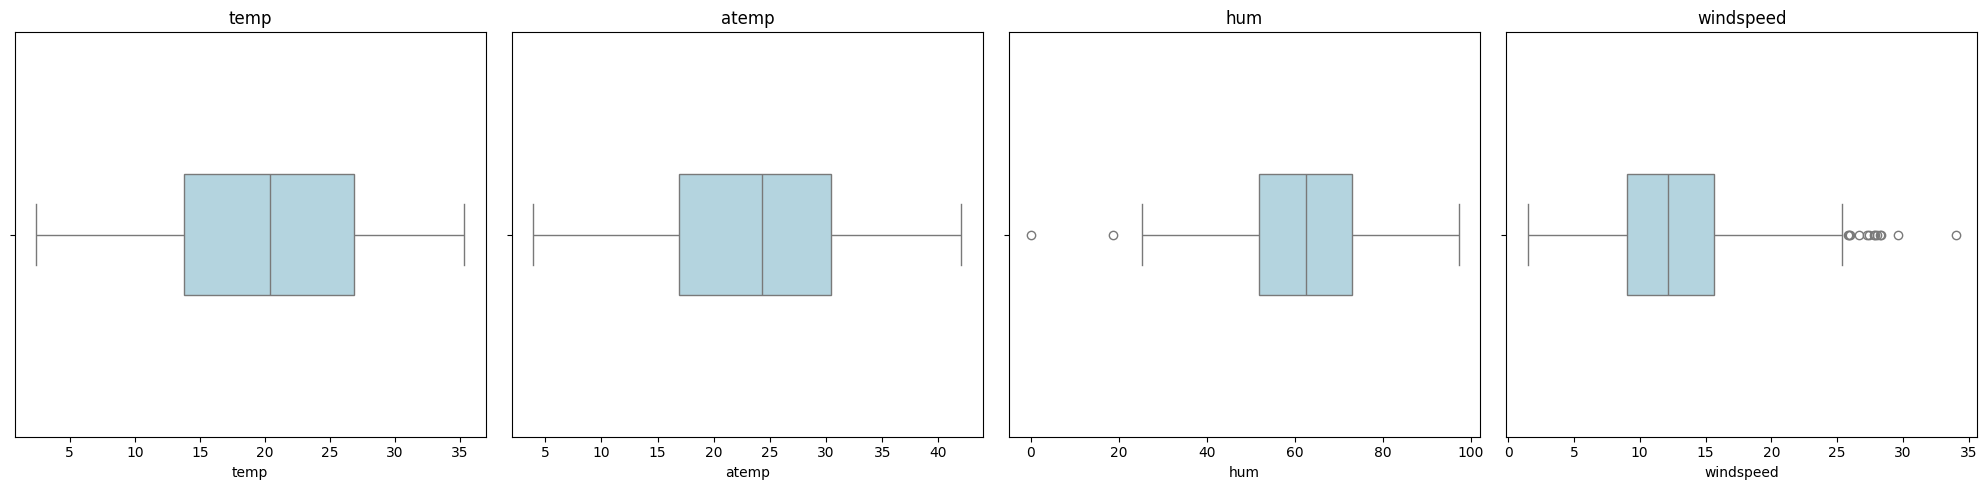

In [220]:
fig, axs = plt.subplots(1, 4, figsize=(20,5))

for i, ax in enumerate(axs):
    sns.boxplot(x=df_float[float_vars[i]], ax=ax, color='lightblue', width=0.3)

    ax.set_title(float_vars[i])
    ax.set_ylabel("")

plt.tight_layout()

plt.show()

temp : tidak ada outlier

atemp : tidak ada outlier

hum : terdapat beberapa outlier

windspeed : terdapat beberapa outlier

### Histogram and Boxplot of bike-share users

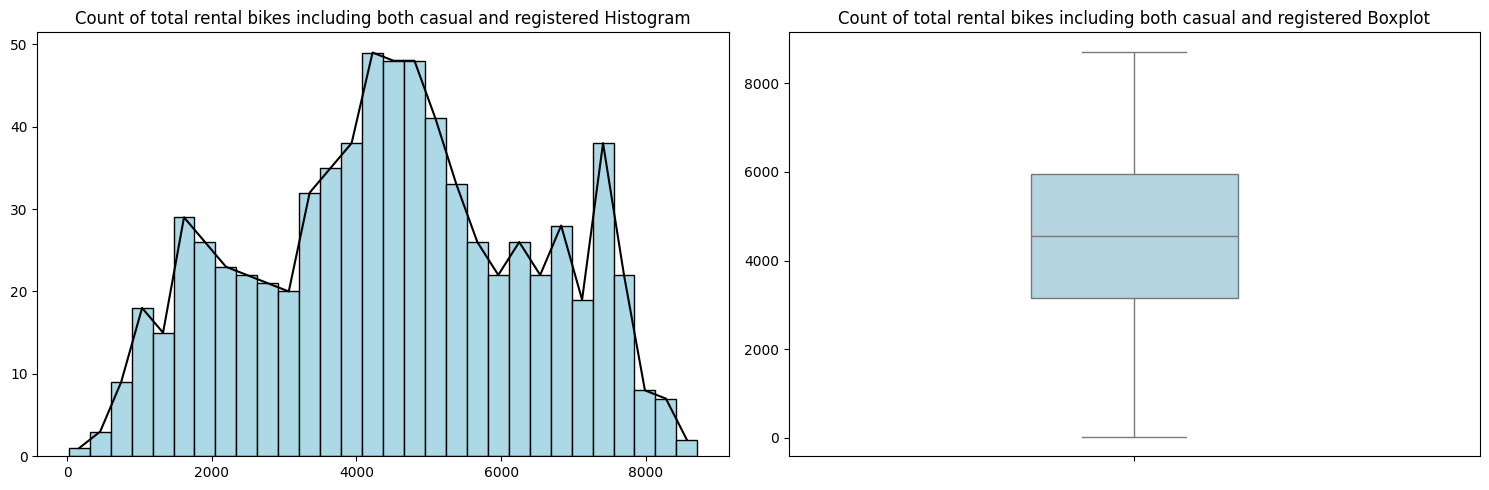

In [221]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot histogram of cnt
counts, bins, patches = axs[0].hist(df['cnt'], bins=30, color='lightblue', edgecolor='black')
midpoints = (bins[1:] + bins[:-1]) / 2
axs[0].plot(midpoints, counts, color='black', linestyle='-')

axs[0].set_title('Count of total rental bikes including both casual and registered Histogram')
axs[0].set_xlabel('')
axs[0].set_ylabel('')


# Plot boxplot of cnt
sns.boxplot(df['cnt'], ax=axs[1], color='lightblue', width=0.3)
axs[1].set_title('Count of total rental bikes including both casual and registered Boxplot')
axs[1].set_ylabel('')

# Show the plots
plt.tight_layout()
plt.show()

Pada hum dan windspeed terdapat outlier yang di mana itu di luar batas nilai maksimum yaitu (97% dan 34 m/h). Pada kenyataannya itu adalah cuaca yang sangat esktrem, sebaiknya tidak berpergian keluar rumah.

### 6.2 Multivariate Analysis

### Count the number of casual and registered users

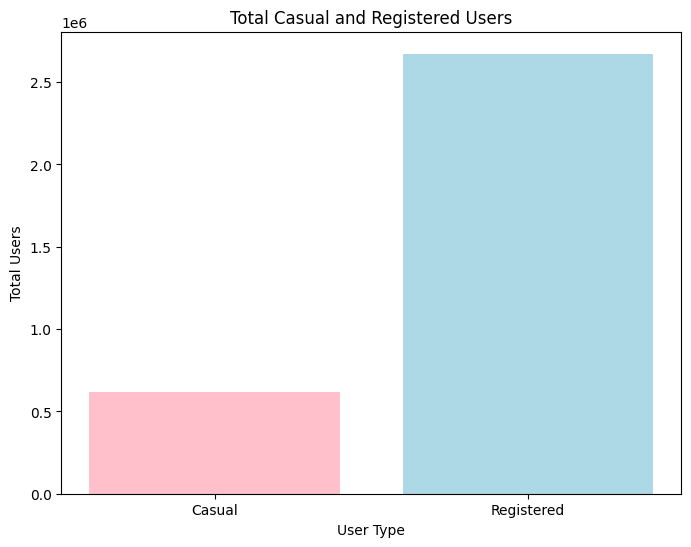

In [222]:
# Count the number of casual and registered users
total_casual_users = df['casual'].sum()
total_registered_users = df['registered'].sum()

casual_color = mcolors.to_rgba('pink')
registered_color = mcolors.to_rgba('lightblue')

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Casual', 'Registered'], [total_casual_users, total_registered_users], color=[casual_color, registered_color])
plt.xlabel('User Type')
plt.ylabel('Total Users')
plt.title('Total Casual and Registered Users')
plt.show()

Total users registered lebih banyak ketimbang casual

### Time series plot of bikeshare users

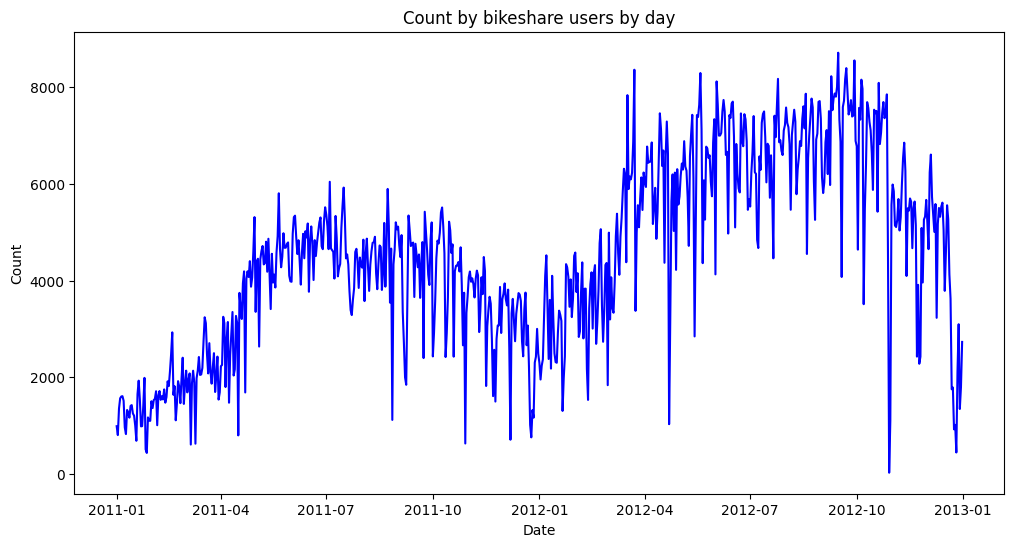

In [223]:
# Convert 'dteday' column to datetime format
df['dteday'] = pd.to_datetime(df['dteday'])

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(df['dteday'], df['cnt'], color='blue')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count by bikeshare users by day')
plt.show()

Perkiraan:

Tahun 2011 bulan 1, 2, 5, 9, 11, 12 jumlah users < 2000

Tahun 2012 bulan 1, 2, 3, 5, dan 11 terjadi jumlah users < 2000

### Boxplot of bikeshare users by type

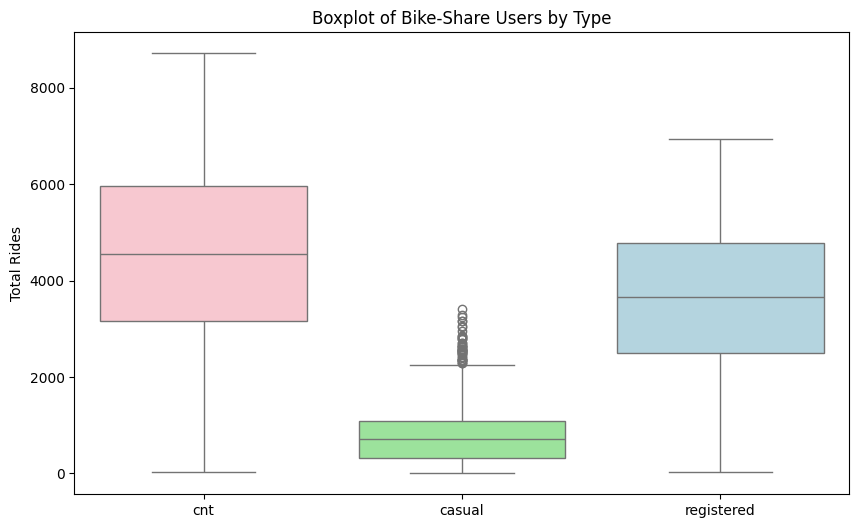

In [224]:
colors = [
    mcolors.to_rgba('pink'),  # cnt
    mcolors.to_rgba('lightgreen'),  # casual
    mcolors.to_rgba('lightblue',)   # registered
]

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['cnt', 'casual', 'registered']], palette=colors)
plt.ylabel('Total Rides')
plt.title('Boxplot of Bike-Share Users by Type')
plt.show()

Hanya casual saja yang memiliki outlier

### Boxplot of bikeshare users by year

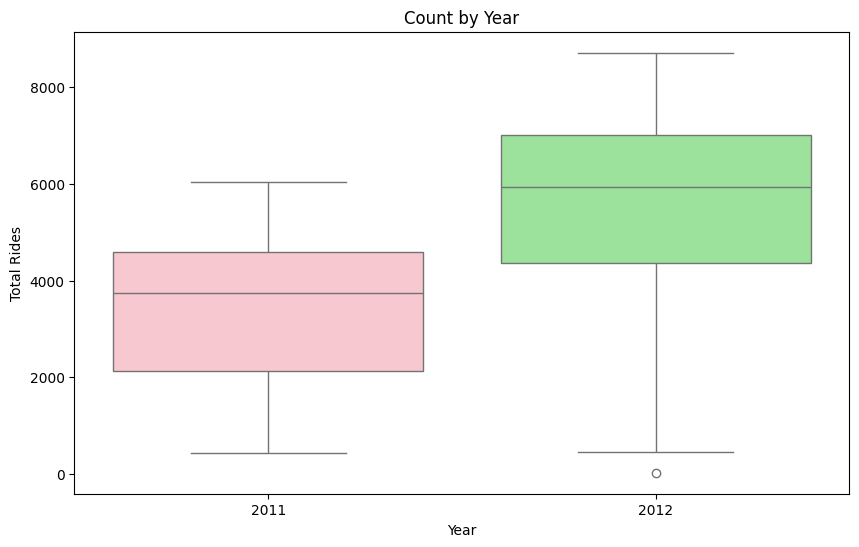

In [225]:
color1 = mcolors.to_rgba('pink')
color2 = mcolors.to_rgba('lightgreen')

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='yr', y='cnt', hue='yr', palette=[color1, color2], legend=False)
plt.xlabel('Year')
plt.ylabel('Total Rides')
plt.title('Count by Year')
plt.show()

Pada tahun 2012 terdapat outlier

### Boxplots of bikeshare users by season

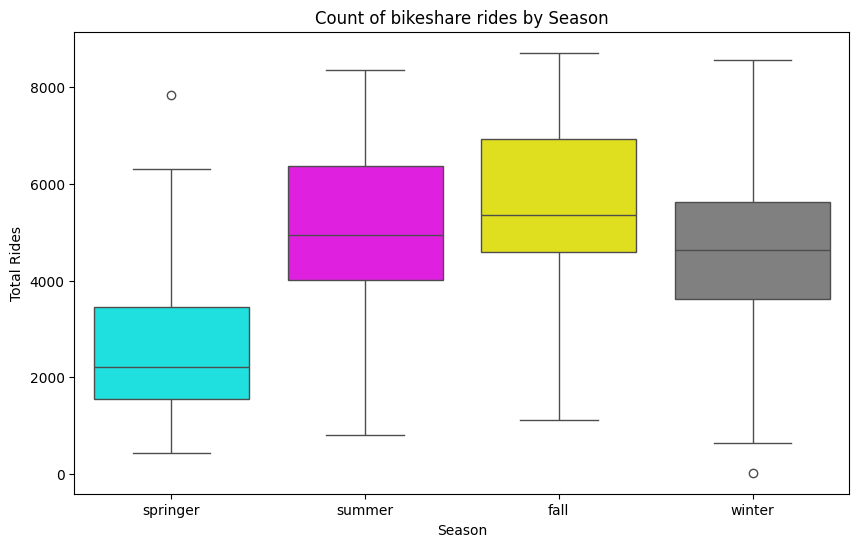

In [226]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='season', y='cnt', hue='season', palette=['cyan', 'magenta', 'yellow', 'grey'], dodge=False)
plt.xlabel('Season')
plt.ylabel('Total Rides')
plt.title('Count of bikeshare rides by Season')
plt.show()

Pada springer dan winter terdapat outlier

<ipython-input-227-d63aa31d5bba>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mnth', y='cnt', palette=['pink', 'lightgreen', 'lightblue'])
<ipython-input-227-d63aa31d5bba>:6: UserWarning: 
The palette list has fewer values (3) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x='mnth', y='cnt', palette=['pink', 'lightgreen', 'lightblue'])


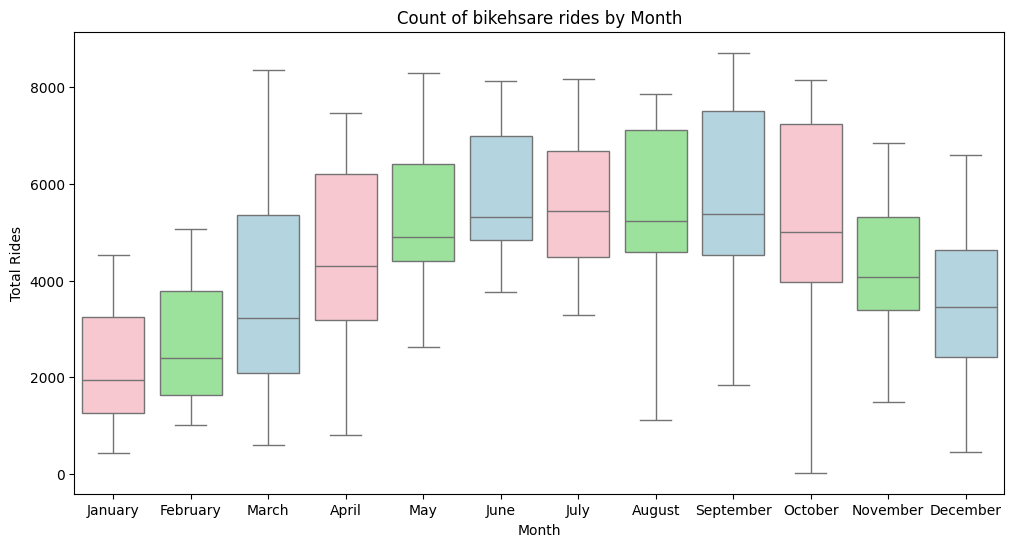

In [227]:
# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='mnth', y='cnt', palette=['pink', 'lightgreen', 'lightblue'])
plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Count of bikehsare rides by Month")
plt.show()

Tidak ada outlier

## Boxplots of bikeshare users by weekday

In [228]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

<ipython-input-229-57cb9accc8f1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='weekday', y='cnt',  palette=['pink', 'lightgreen', 'lightblue'])
<ipython-input-229-57cb9accc8f1>:6: UserWarning: 
The palette list has fewer values (3) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x='weekday', y='cnt',  palette=['pink', 'lightgreen', 'lightblue'])


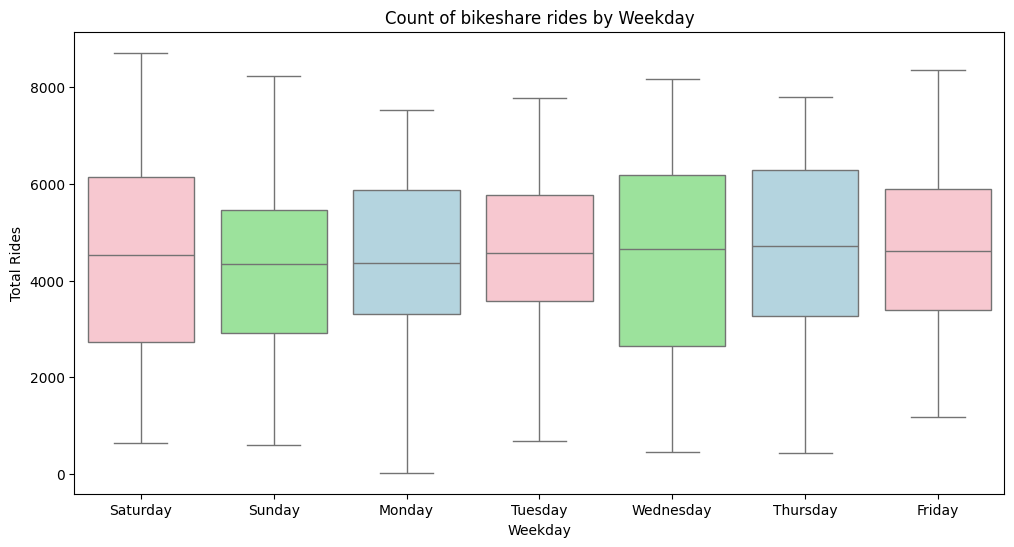

In [229]:
# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='weekday', y='cnt',  palette=['pink', 'lightgreen', 'lightblue'])
plt.xlabel("Weekday")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Weekday")
plt.show()

Tidak ada outlier

### Boxplots of bikeshare users by holiday

<ipython-input-230-baaf700ae1a8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='holiday', y='cnt', palette=[zero_color, one_color])


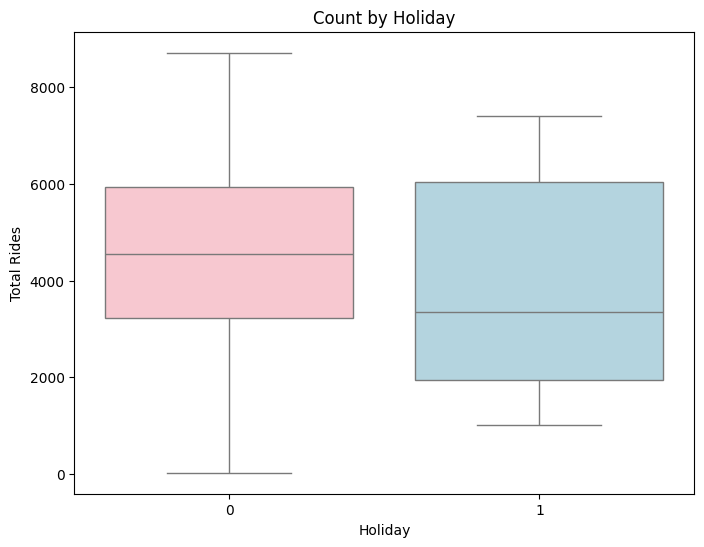

In [230]:
# Convert colors to RGBA format
zero_color = mcolors.to_rgba('pink')
one_color = mcolors.to_rgba('lightblue')

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='holiday', y='cnt', palette=[zero_color, one_color])
plt.xlabel("Holiday")
plt.ylabel("Total Rides")
plt.title("Count by Holiday")
plt.show()

Tidak ada outlier

### Boxplots of bikeshare users by workingday

<ipython-input-231-0c1b526caf55>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='workingday', y='cnt', palette=[zero_color, one_color])


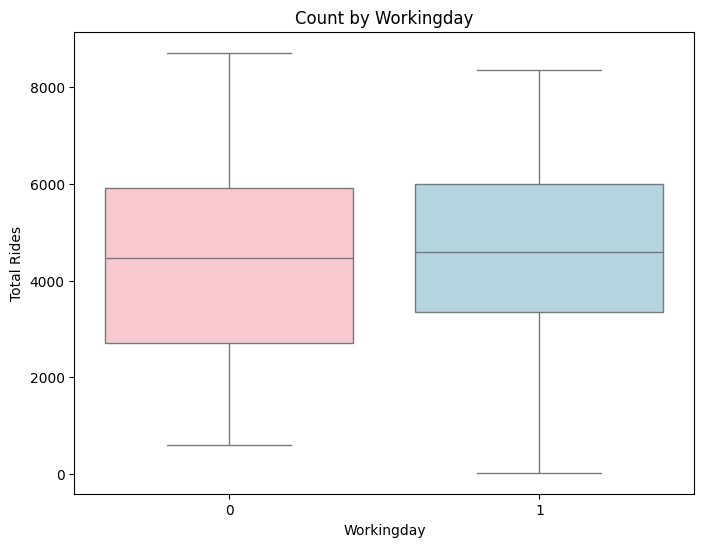

In [231]:
# Convert colors to RGBA format
zero_color = mcolors.to_rgba('pink')
one_color = mcolors.to_rgba('lightblue')

# Buat boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='workingday', y='cnt', palette=[zero_color, one_color])
plt.xlabel("Workingday")
plt.ylabel("Total Rides")
plt.title("Count by Workingday")
plt.show()

Tidak ada outlier

## Scatterplot of temperature, feeling temperature, humidity. and windspeed vs. count of bikeshare users

In [232]:
scatter_vars = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']
df_scatter = df[scatter_vars]

df_scatter.head(10)

,cnt,temp,atemp,hum,windspeed
0,985,14.110847,18.18125,80.5833,10.749882
1,801,14.902598,17.68695,69.6087,16.652113
2,1349,8.050924,9.47025,43.7273,16.636703
3,1562,8.200000,10.60610,59.0435,10.739832
4,1600,9.305237,11.46350,43.6957,12.522300
5,1606,8.378268,11.66045,51.8261,6.000868
6,1510,8.057402,10.44195,49.8696,11.304642
7,959,6.765000,8.11270,53.5833,17.875868
8,822,5.671653,5.80875,43.4167,24.250650
9,1321,6.184153,7.54440,48.2917,14.958889


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

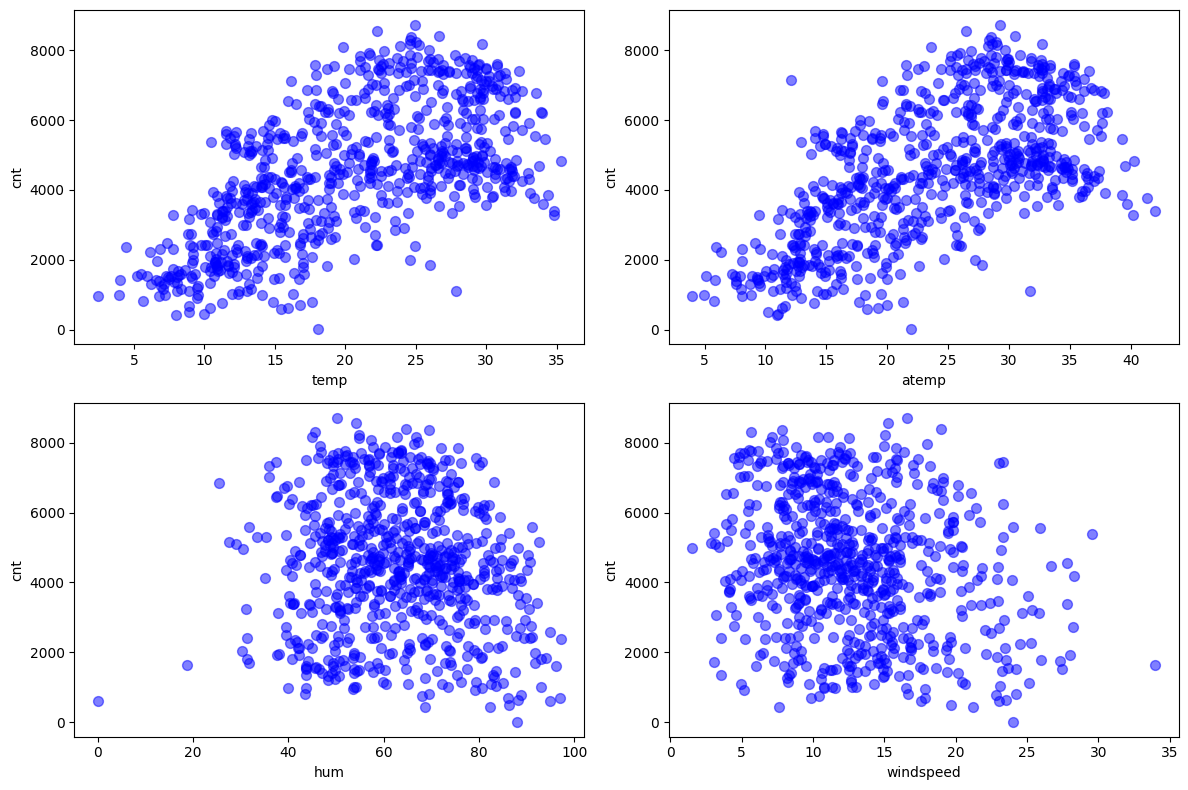

In [234]:
scatter_vars = ['temp', 'atemp', 'hum', 'windspeed']
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, var in enumerate(scatter_vars):
    row = i // 2
    col = i % 2
    axs[row, col].scatter(df_scatter[var], df_scatter['cnt'], color='blue', marker='o', s=50, alpha=0.5)
    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel('cnt')

plt.tight_layout()
plt.show()

temp : ketika suhu > 5 derajat maka jumlah yang menyewa sepeda semakin meningkat walaupun ada sedikit penurunan di > 25 derajat


atemp : ketika suhu > 5 derajat maka jumlah yang menyewa sepeda semakin meningkat walaupun ada sedikit penurunan di > 30 derajat

hum : ketika kelembaban >= 40 persen maka jumlah yang menyewa sepeda semakin meningkat walaupun ada sedikit penurunan di >= 70 persen

windspeed : ketika kecepatan angin >= 30 m/h sedikit sekali jumlah yang menyewa sepeda

### Correlation and Correlation Heat Map

In [235]:
df.corr(numeric_only=True)

,instant,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866025,0.016145,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
yr,0.866025,1.000000,0.007954,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
holiday,0.016145,0.007954,1.000000,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
workingday,-0.004337,-0.002013,-0.253023,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.048727,-0.034627,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.047604,-0.028556,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.046106,-0.032507,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.016375,-0.110651,-0.015937,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.112620,-0.011817,0.006292,-0.018796,0.039511,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.275255,0.248546,0.054274,-0.518044,-0.247353,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804


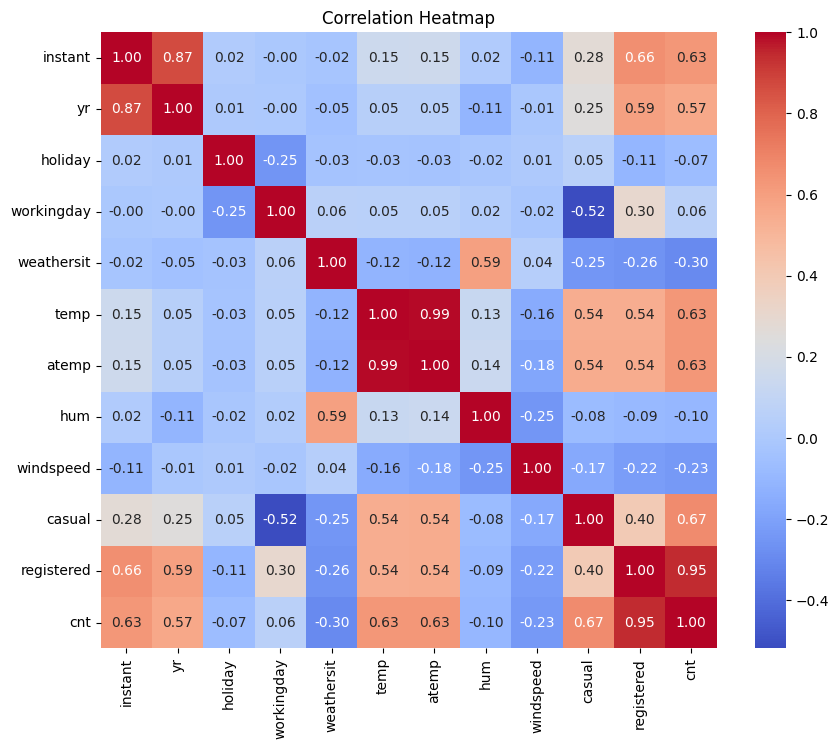

In [236]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

*   Nilai korelasi 1 menunjukkan hubungan linier positif sempurna di mana satu variabel naik seiring dengan kenaikan yang sama dalam variabel lain.
*   Nilai korelasi -1 menunjukkan hubungan linier negatif sempurna di mana satu variabel naik seiring dengan penurunan yang sama dalam variabel lain.
*   Nilai korelasi 0 menunjukkan tidak adanya hubungan linier antara dua variabel.


---


1.   yr (tahun) dan instant (nomor instan): Korelasi positif yang kuat (0.866), menunjukkan bahwa nomor instan dan tahun cenderung berkorelasi positif, artinya nomor instan cenderung meningkat seiring dengan tahun yang lebih baru.

2.   hum (kelembaban) dan weathersit (kondisi cuaca): Korelasi positif yang moderat (0.591), menunjukkan bahwa kelembaban cenderung meningkat dengan buruknya kondisi cuaca.

3.   casual dan registered terhadap cnt (total sewa): Korelasi positif yang kuat, khususnya untuk registered (0.945) dan cnt, yang menunjukkan bahwa jumlah total sewa (cnt) sangat dipengaruhi oleh jumlah sewa terdaftar (registered).

4.   workingday (hari kerja) dan casual (sewa tidak terdaftar): Korelasi negatif yang moderat (-0.518), menunjukkan bahwa sewa tidak terdaftar (casual) cenderung lebih tinggi pada hari libur atau hari non-kerja.

5.   temp (suhu) dan atemp (suhu dengan kecepatan angin rata-rata): Korelasi yang sangat tinggi (0.991), menunjukkan bahwa kedua variabel ini sangat berkorelasi, sehingga dapat dianggap redundan dalam analisis.

### 7. Visualization and Explanatory Data Analysis

Pada bab ini, kita akan menjawab pertanyaan yang telah ditentukan sebelumnya.


1.   Bagaimana tren peminjaman sepeda berdasarkan bulan dari tahun 2011 - 2012?
2.   Apakah terdapat perbedaan pola peminjaman antara casual dan registered?
3.   Apakah musim berpengaruh terhadap jumlah peminjaman sepeda?
4.   Bagaimana pengaruh suhu, kelembaban, dan kecepatan angin terhadap jumlah peminjaman sepeda?


### 7.1 Bagaimana tren peminjaman sepeda berdasarkan bulan dari tahun 2011 - 2012?

In [237]:
monthly_users_df = df.resample(rule='M', on='dteday').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

monthly_users_df.head(3)

,casual,registered,cnt
dteday,,,
2011-01-31,3073,35116,38189
2011-02-28,6242,41973,48215
2011-03-31,12826,51219,64045


In [238]:
monthly_users_df.index = monthly_users_df.index.strftime('%b-%y')

In [239]:
monthly_users_df.head(10)

,casual,registered,cnt
dteday,,,
Jan-11,3073,35116,38189
Feb-11,6242,41973,48215
Mar-11,12826,51219,64045
Apr-11,22346,72524,94870
May-11,31050,104771,135821
Jun-11,30612,112900,143512
Jul-11,36452,104889,141341
Aug-11,28842,107849,136691
Sep-11,26545,100873,127418


In [240]:
monthly_users_df = monthly_users_df.reset_index()

In [241]:
monthly_users_df = monthly_users_df.rename(columns={'dteday': 'yearmonth'})

In [242]:
monthly_users_df.head(10)

,yearmonth,casual,registered,cnt
0,Jan-11,3073,35116,38189
1,Feb-11,6242,41973,48215
2,Mar-11,12826,51219,64045
3,Apr-11,22346,72524,94870
4,May-11,31050,104771,135821
5,Jun-11,30612,112900,143512
6,Jul-11,36452,104889,141341
7,Aug-11,28842,107849,136691
8,Sep-11,26545,100873,127418
9,Oct-11,25222,98289,123511


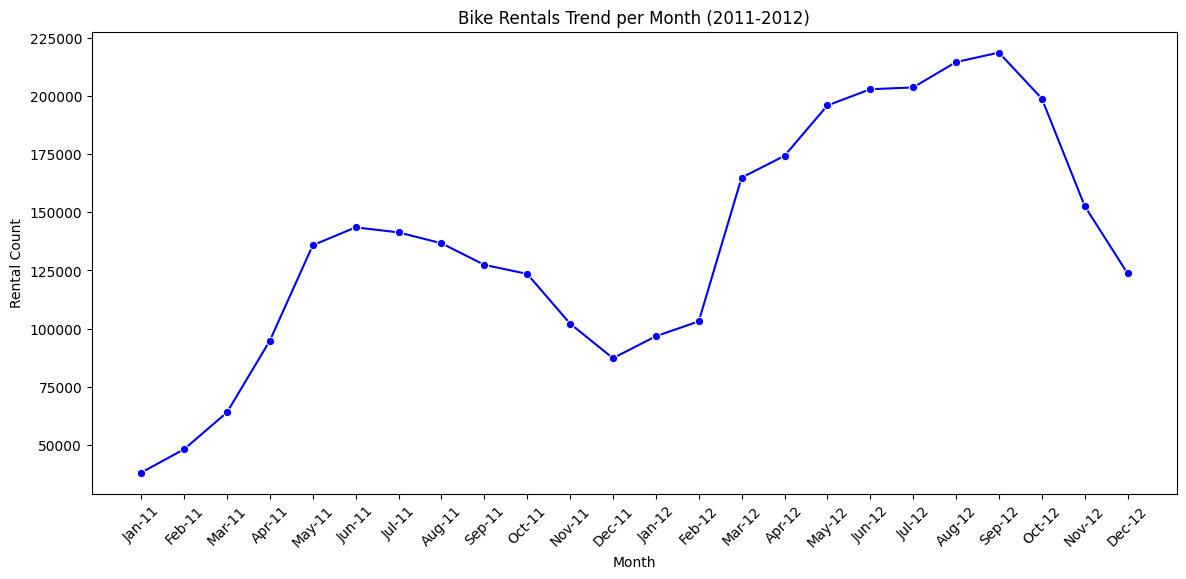

In [243]:
# Mengatur ukuran gambar
plt.figure(figsize=(14, 6))

# Menggunakan lineplot untuk plot tren
sns.lineplot(x='yearmonth', y='cnt', data=monthly_users_df, marker='o', color='blue')
plt.title('Bike Rentals Trend per Month (2011-2012)')
plt.xlabel('Month')
plt.ylabel('Rental Count')
plt.xticks(rotation=45)  # Putar label x untuk memperbaiki tampilan
plt.show()

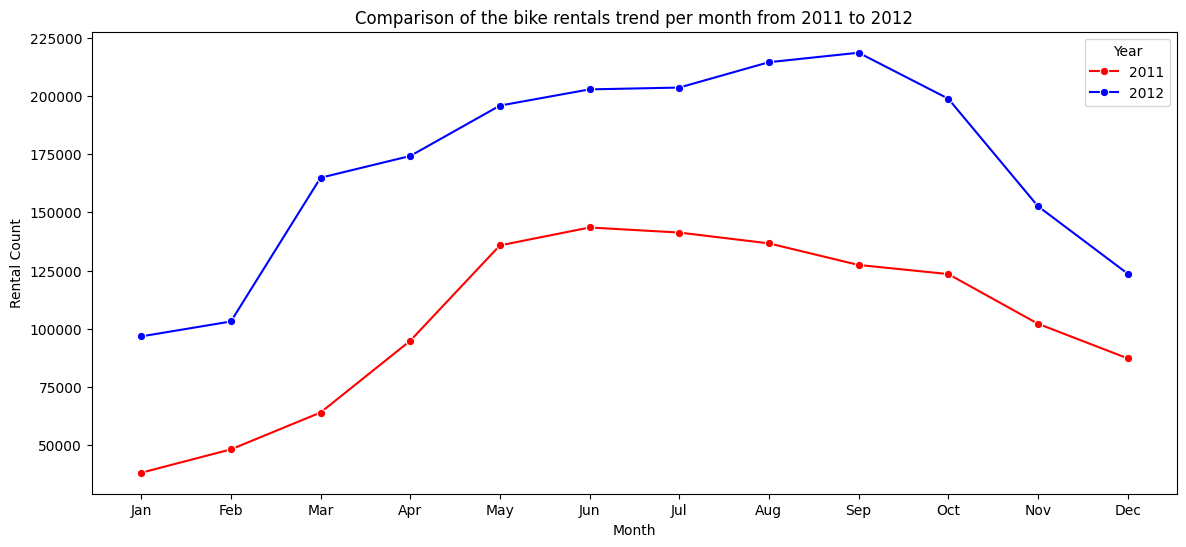

In [244]:
# Convert colors to RGBA format
eleven_color = mcolors.to_rgba('red')
twelve_color = mcolors.to_rgba('blue')

# Convert 'dteday' column to datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Extract year and month from 'dteday' column
df['year'] = df['dteday'].dt.year
df['month'] = df['dteday'].dt.month

# Group data by year and month, then calculate total rentals for each month
monthly_rentals = df.groupby(['year', 'month'])['cnt'].sum().reset_index()

# Set figure size
plt.figure(figsize=(14, 6))

# Use lineplot to plot the trend
sns.lineplot(x='month', y='cnt', hue='year', data=monthly_rentals, marker='o', palette=[eleven_color, twelve_color])
plt.title('Comparison of the bike rentals trend per month from 2011 to 2012')
plt.xlabel('Month')
plt.ylabel('Rental Count')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.show()

Informasi:

1.   Pada tahun 2011, terjadi penurunan hampir 75.000 penyewa sepeda per bulan dari bulan Juni hingga Desember. Pada bulan Juni 2011, jumlah penyewa sepeda <= 150.000, sedangkan pada bulan Desember 2011, jumlahnya turun menjadi >= 75.000.

    Pada tahun 2012, terjadi penurunan hampir 100.000 penyewa sepeda per bulan dari bulan September hingga Desember. Pada bulan September 2012, jumlah penyewa sepeda <= 225.000, sedangkan pada bulan Desember 2012, jumlahnya turun menjadi 125.000.
2.   Perbandingan tahun 2011 dengan 2012, kenaikan yang sangat signifikan terjadi pada bulan januari 2012 - september 2012, yaitu >= 75.000 sampai <=225.000





## 7.2 Apakah terdapat perbedaan pola peminjaman antara casual dan registered?

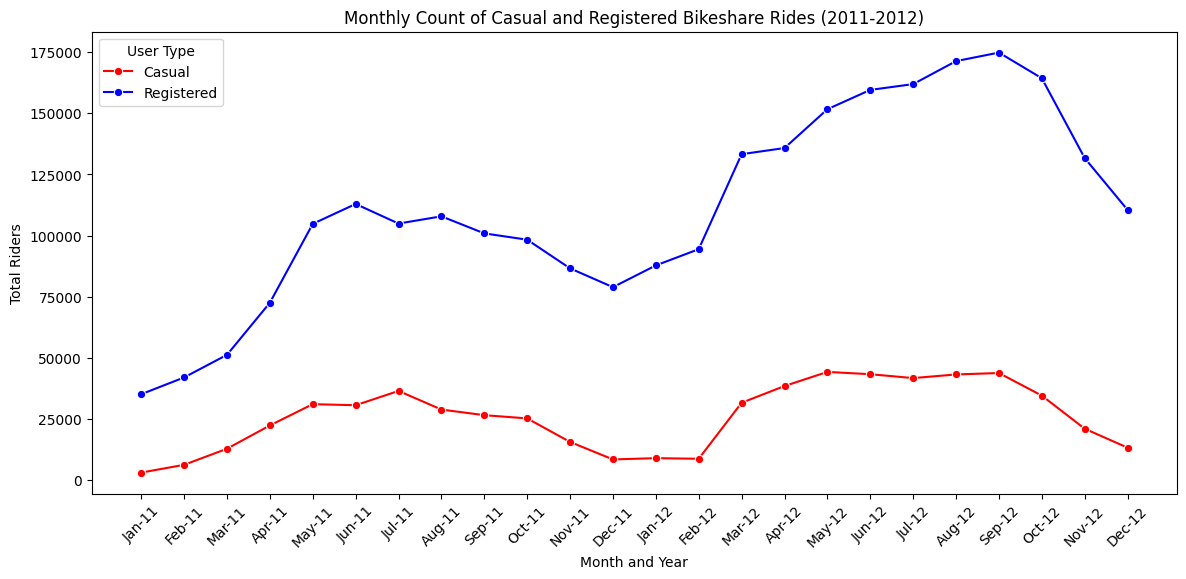

In [245]:
# Set the size of the figure
plt.figure(figsize=(14, 6))

# Use lineplot to plot the trend for casual and registered rides
sns.lineplot(x='yearmonth', y='casual', data=monthly_users_df, marker='o', color='red', label='Casual')
sns.lineplot(x='yearmonth', y='registered', data=monthly_users_df, marker='o', color='blue', label='Registered')

plt.title('Monthly Count of Casual and Registered Bikeshare Rides (2011-2012)')
plt.xlabel('Month and Year')
plt.ylabel('Total Riders')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='User Type')
plt.show()

Informasi:
1.   Perbandingan jumlah pengguna tipe casual dan registered menunjukkan bahwa pada bulan Mei 2012, tipe casual memiliki total riders terbanyak, sedangkan pada bulan September 2012, total riders terbanyak adalah untuk tipe registered.


### 7.3 Apakah musim berpengaruh terhadap jumlah peminjaman sepeda?

In [246]:
seasonly_users_df = df.groupby("season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

seasonly_users_df

,casual,registered,cnt
season,,,
fall,226091,835038,1061129
springer,60622,410726,471348
summer,203522,715067,918589
winter,129782,711831,841613


In [247]:
seasonly_users_df = seasonly_users_df.reset_index()

In [248]:
seasonly_users_df

,season,casual,registered,cnt
0,fall,226091,835038,1061129
1,springer,60622,410726,471348
2,summer,203522,715067,918589
3,winter,129782,711831,841613


In [249]:
season_order = ['springer', 'summer', 'fall', 'winter']

In [251]:
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

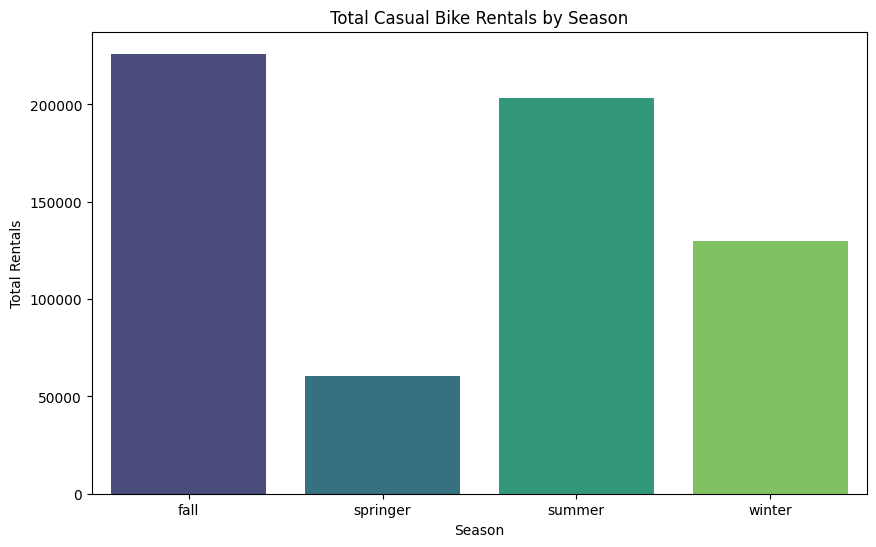

In [252]:
plt.figure(figsize=(10, 6))
sns.barplot(x="season", y="casual", data=seasonly_users_df, hue="season", palette="viridis", legend=False)
plt.title('Total Casual Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.show()

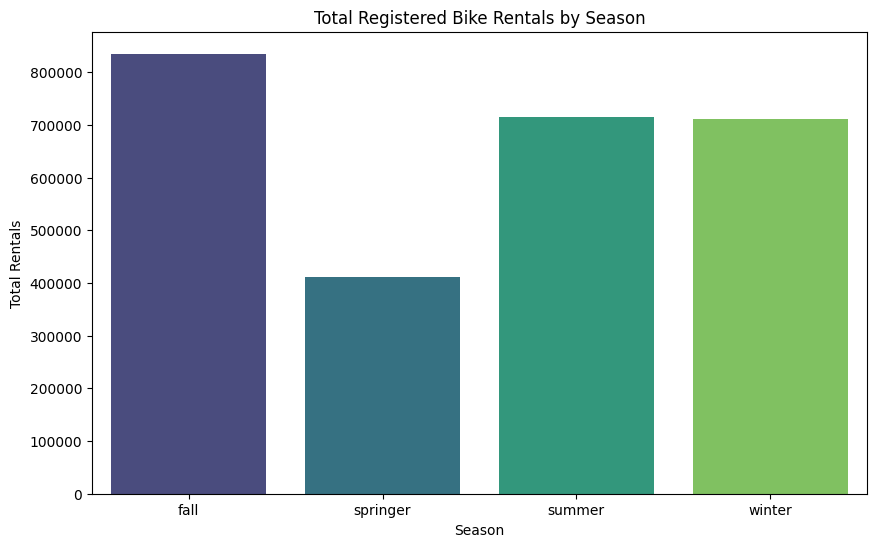

In [253]:
plt.figure(figsize=(10, 6))
sns.barplot(x="season", y="registered", data=seasonly_users_df, hue="season", palette="viridis", legend=False)
plt.title('Total Registered Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.show()

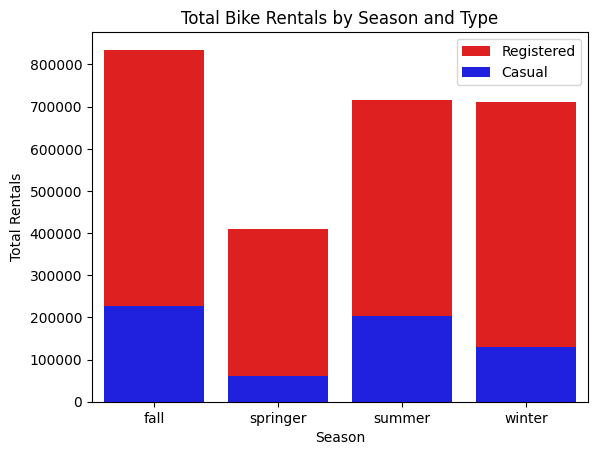

In [254]:
sns.barplot(x="season", y="registered", data=seasonly_users_df, color='red', label='Registered')

# Plot untuk sewa biasa
sns.barplot(x="season", y="casual", data=seasonly_users_df, color='blue', label='Casual')

plt.title('Total Bike Rentals by Season and Type')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.legend()

plt.show()

Informasi:

1.   Terjadi penurunan drastis pada jumlah total penyewaan di musim springer, dengan total sewa di bawah 10.000, dan di musim winter, dengan total sewa di bawah 15.000.
2.   Penurunan drastis hanya terjadi pada jumlah total penyewaan di musim springer, dengan total di bawah 500.000.
3.   Pada season fall total rentals lebih banyak dari ketiga musim, lalu disusul oleh summer, winter, dan terakhir springer.

### 7.4 Bagaimana pengaruh suhu, kelembaban, dan kecepatan angin terhadap jumlah peminjaman sepeda?

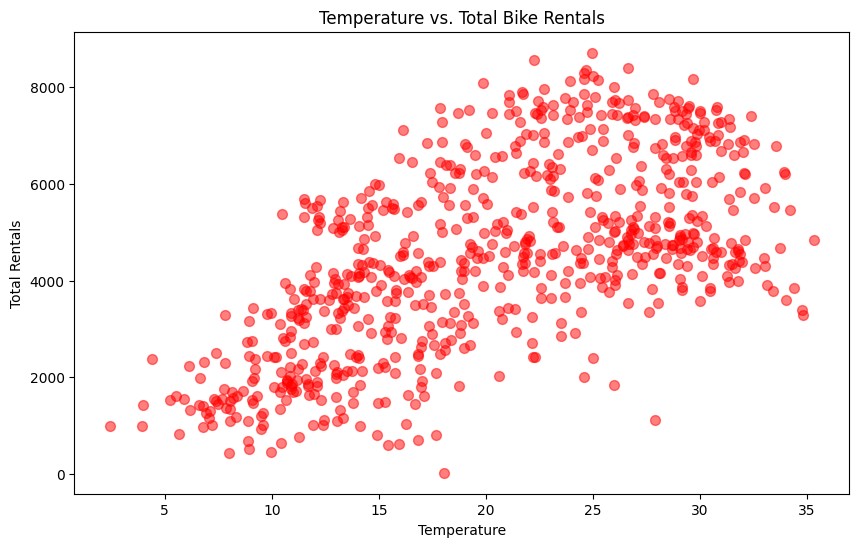

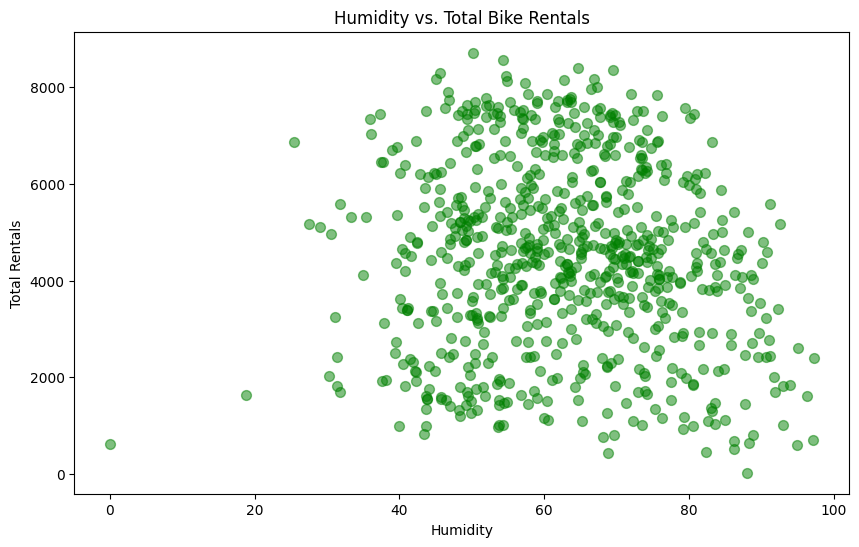

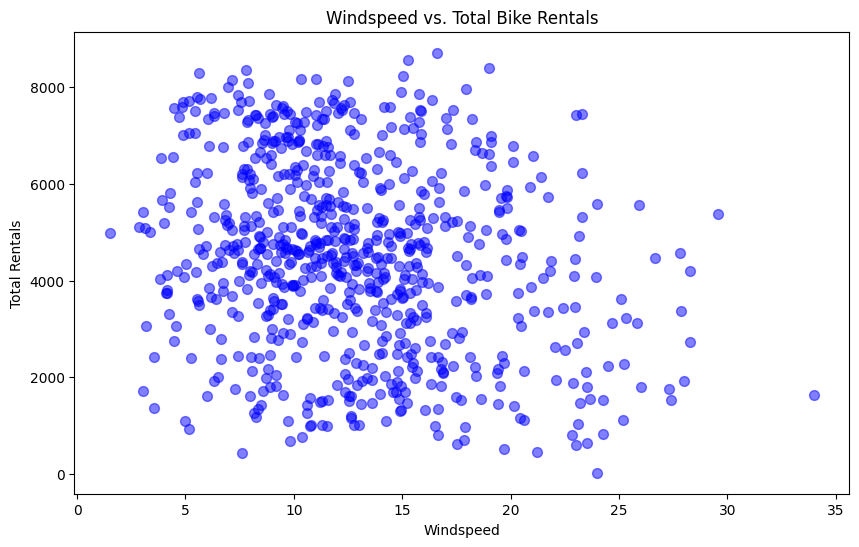

In [262]:
# Create a scatter plot for temperature vs. total rentals
plt.figure(figsize=(10, 6))
plt.scatter(df['temp'], df['cnt'], color='red', marker='o', s=50, alpha=0.5)
plt.title('Temperature vs. Total Bike Rentals')
plt.xlabel('Temperature')
plt.ylabel('Total Rentals')
plt.show()

# Create a scatter plot for humidity vs. total rentals
plt.figure(figsize=(10, 6))
plt.scatter(df['hum'], df['cnt'], color='green', marker='o', s=50, alpha=0.5)
plt.title('Humidity vs. Total Bike Rentals')
plt.xlabel('Humidity')
plt.ylabel('Total Rentals')
plt.show()

# Create a scatter plot for windspeed vs. total rentals
plt.figure(figsize=(10, 6))
plt.scatter(df['windspeed'], df['cnt'], color='blue', marker='o', s=50, alpha=0.5)
plt.title('Windspeed vs. Total Bike Rentals')
plt.xlabel('Windspeed')
plt.ylabel('Total Rentals')
plt.show()

Informasi:


1.   Terdapat korelasi positif antara suhu dan jumlah penyewaan sepeda. Khususnya, seiring meningkatnya suhu, jumlah persewaan sepeda juga cenderung meningkat.
2.   Terdapat korelasi antara kelembaban dan jumlah penyewaan sepeda. Seiring meningkatnya kelembaban, jumlah penyewaan sepeda juga cenderung meningkat.
Namun, ada beberapa titik yang menampilkan jumlah penyewa sepeda ketika kelembaban rendah.
3.   Terdapat korelasi negatif antara kecepatan angin dan jumlah penyewaan sepeda. Semakin angin kencang maka jumlah yang menyewa semakin sedikit dan semakin lambat angin maka jumlah yang menyewa semakin banyak.




### 8. Conclusion

### 8.1 Bagaimana tren peminjaman sepeda berdasarkan bulan dari tahun 2011 - 2012?


Kesimpulannya, terjadi fluktuasi yang signifikan dalam jumlah penyewa sepeda dari tahun 2011 ke tahun 2012, dengan penurunan yang tajam terutama terjadi pada akhir tahun. Namun, terdapat juga kenaikan yang signifikan pada periode tertentu, terutama dari bulan Januari hingga September 2012.

### 8.2 Apakah terdapat perbedaan pola peminjaman antara casual dan registered?

Hal ini menunjukkan adanya variasi dalam preferensi pengguna sepeda pada bulan-bulan tertentu. Pada bulan Mei, mungkin terjadi peningkatan aktivitas rekreasi atau wisata yang menyebabkan peningkatan penggunaan sepeda tanpa pendaftaran. Sementara itu, pada bulan September, kemungkinan terdapat peningkatan penggunaan sepeda untuk tujuan transportasi sehari-hari, yang lebih sering dilakukan oleh pengguna yang terdaftar.

### 8.3 Apakah musim berpengaruh terhadap jumlah peminjaman sepeda?

Musim fall adalah musim dengan tingkat penyewaan tertinggi, sementara springer adalah musim dengan tingkat penyewaan terendah dan mengalami penurunan drastis dalam jumlah total penyewaan.

### 8.4 Bagaimana pengaruh suhu, kelembaban, dan kecepatan angin terhadap jumlah peminjaman sepeda?

Terdapat korelasi positif antara suhu dan jumlah penyewaan sepeda, yang berarti jumlah penyewaan cenderung meningkat seiring dengan meningkatnya suhu.


Korelasi antara kelembaban dan jumlah penyewaan sepeda juga positif, meskipun tidak sekuat korelasi dengan suhu. Ada penurunan jumlah penyewaan saat kelembaban rendah, menunjukkan adanya faktor lain yang memengaruhi keputusan penyewaan.


Korelasi negatif antara kecepatan angin dan jumlah penyewaan sepeda, yang menunjukkan bahwa angin kencang membuat jumlah penyewaan cenderung berkurang.



